In [13]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


In [33]:
data = pd.read_csv('dmsTraining_2017-02-20.csv')
data = data[data.snap2score.isnull() == False]

In [34]:
data.head()

,id3,variant_id,dms_id,first_author,protein,id,snap2score,protein_size,assay_type,organism,...,seq_ind_closest_mut,scaled_effect1,selection_coefficient,evolutionary_coupling_avg,evolutionary_coupling_prop,evolutionary_coupling_avg_norm,discrete,discrete_dam,discrete_neutral,discrete_enhancing
0,P62593_20,beta-lactamase_P20P,beta-lactamase,Firnberg,TEM-1,TEM-1_P20P,-80.0,286,in_vivo,E. coli,...,NaN,1.581033,0.221619,0.002353,0.0,0.122698,enhancing,other,other,enhancing
1,P62593_207,beta-lactamase_D207D,beta-lactamase,Firnberg,TEM-1,TEM-1_D207D,-93.0,286,in_vivo,E. coli,...,NaN,1.425631,0.221619,0.005929,0.0,0.309164,enhancing,other,other,enhancing
2,P62593_215,beta-lactamase_A215A,beta-lactamase,Firnberg,TEM-1,TEM-1_A215A,-79.0,286,in_vivo,E. coli,...,NaN,1.422813,0.221619,0.005440,0.0,0.283649,enhancing,other,other,enhancing
3,P62593_75,beta-lactamase_C75C,beta-lactamase,Firnberg,TEM-1,TEM-1_C75C,-98.0,286,in_vivo,E. coli,...,NaN,1.415532,0.221619,0.003462,0.0,0.180490,enhancing,other,other,enhancing
4,P62593_134,beta-lactamase_N134N,beta-lactamase,Firnberg,TEM-1,TEM-1_N134N,-68.0,286,in_vivo,E. coli,...,NaN,1.396966,0.221619,0.000645,0.0,0.033620,enhancing,other,other,enhancing


id3                               8483
variant_id                        8483
dms_id                            8483
first_author                      8483
protein                           8483
id                                8483
snap2score                           0
protein_size                      8483
assay_type                        8483
organism                          8483
uniprot_id                        8483
pdb_id                             452
pdb_chain_id                       150
reported_fitness                  8483
aa1                               8483
aa2                               8483
wt_mut                            8460
mut_type                          8483
position                          8483
id2                               8483
WT_Mut                            8460
Variant                           8483
aa1_polarity                      8483
aa2_polarity                      8483
aa1_PI                            8483
aa2_PI                   

In [35]:
# snap2score - prediction score
# scaled_effect - true effect
data.snap2score.head()

0   -80.0
1   -93.0
2   -79.0
3   -98.0
4   -68.0
Name: snap2score, dtype: float64

In [36]:
# assume that effect is present when deviation from the mean is more than one standard deviation
data['has_effect'] = np.abs((data.scaled_effect1 - data.scaled_effect1.mean()) / data.scaled_effect1.std()) > 1

In [37]:
data.has_effect.value_counts()

False    16234
True      5551
Name: has_effect, dtype: int64

In [38]:
data['snap2score_normalized'] = (data.snap2score) + 100 / 200

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(data.has_effect, data.snap2score_normalized)
auc = roc_auc_score(data.has_effect, data.snap2score_normalized)
print('AUC: %.3f' % auc)

AUC: 0.625


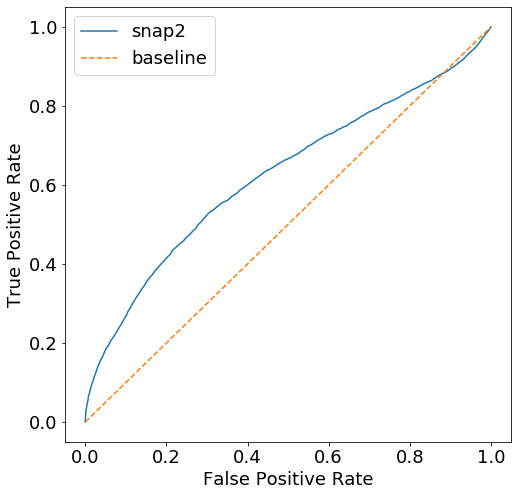

In [54]:
fig = plt.figure(figsize=(8,8))
baseline = np.linspace(0, 1, num=50)
ax = fig.add_subplot(111)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
ax.plot(fpr, tpr, label='snap2')
ax.plot(baseline, baseline, '--', label='baseline')
plt.legend()
